In [2]:
from DateRanges import e_year_ranges, ne_1_year_ranges, ne_3_year_ranges
import FixedIncomeAnalysisClass as FI
import matplotlib.pyplot as plt
import pandas as pd

Creating the dataframe

In [3]:
df = pd.read_csv("Data/TreasuryData/merged_cleaned_treasury_data.csv")
df.Date = pd.to_datetime(df.Date)
df.index = df.Date
df = df.drop(columns = ["Unnamed: 0", "Date"])
df

,GT 10 GOVT 11_15_34 Close,GT 5 GOVT 10_31_29 Close,GT 30 GOVT 11_15_54 Close,GB 06 GOVT 05_08_25 Close
Date,,,,
1991-03-15,8.094,7.715,8.288,6.087
1991-03-18,8.144,7.788,8.332,6.118
1991-03-19,8.234,7.909,8.403,6.199
1991-03-20,8.167,7.851,8.343,6.177
1991-03-21,8.139,7.804,8.329,6.144
...,...,...,...,...
2024-11-05,4.273,4.150,4.436,4.418
2024-11-06,4.433,4.275,4.612,4.437
2024-11-07,4.328,4.172,4.531,4.416


In [4]:
for year in e_year_ranges:
    start_date, end_date = e_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]

    print(new_df.std())
    
    """
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.show()"""
    

GT 10 GOVT 11_15_34 Close    0.356075
GT 5 GOVT 10_31_29 Close     0.472364
GT 30 GOVT 11_15_54 Close    0.205153
GB 06 GOVT 05_08_25 Close    0.331144
dtype: float64
GT 10 GOVT 11_15_34 Close    0.209281
GT 5 GOVT 10_31_29 Close     0.219640
GT 30 GOVT 11_15_54 Close    0.168664
GB 06 GOVT 05_08_25 Close    0.102513
dtype: float64
GT 10 GOVT 11_15_34 Close    0.228657
GT 5 GOVT 10_31_29 Close     0.287855
GT 30 GOVT 11_15_54 Close    0.135144
GB 06 GOVT 05_08_25 Close    0.073686
dtype: float64
GT 10 GOVT 11_15_34 Close    0.271168
GT 5 GOVT 10_31_29 Close     0.242426
GT 30 GOVT 11_15_54 Close    0.236270
GB 06 GOVT 05_08_25 Close    0.255703
dtype: float64
GT 10 GOVT 11_15_34 Close    0.176653
GT 5 GOVT 10_31_29 Close     0.332098
GT 30 GOVT 11_15_54 Close    0.210555
GB 06 GOVT 05_08_25 Close    0.435210
dtype: float64
GT 10 GOVT 11_15_34 Close    0.107117
GT 5 GOVT 10_31_29 Close     0.060332
GT 30 GOVT 11_15_54 Close    0.137393
GB 06 GOVT 05_08_25 Close    0.008395
dtype: float6

NameError: name 'election_day' is not defined

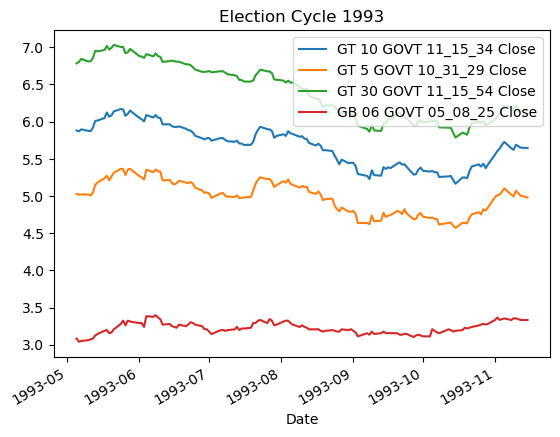

In [5]:
for year in ne_1_year_ranges:
    start_date, end_date = ne_1_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]
    
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.axvline(election_day(int(year)), color = "b", linestyle = "--")
    plt.show()

In [ ]:
df["Objects"] = df["GT 10 GOVT 11_15_34 Close"].apply(lambda x : FI.Treasuries(x, .5) )
df["GT 10 GOVT 11_15_34 Close"]

Date
2024-11-12    4.397
2024-11-08    4.305
2024-11-07    4.328
2024-11-06    4.433
2024-11-05    4.273
              ...  
1991-03-21    8.139
1991-03-20    8.167
1991-03-19    8.234
1991-03-18    8.144
1991-03-15    8.094
Name: GT 10 GOVT 11_15_34 Close, Length: 8414, dtype: float64

In [ ]:
df["Objects"].apply(lambda x : x.value_at_risk())

Date
2024-11-12    3522.810627
2024-11-08    3527.663137
2024-11-07    3615.658178
2024-11-06    3222.965680
2024-11-05    3594.716160
                 ...     
1991-03-21     979.583720
1991-03-20     967.446851
1991-03-19     959.461409
1991-03-18     983.183901
1991-03-15    1009.431517
Name: Objects, Length: 8414, dtype: float64